# Importing packages

In [3]:
%matplotlib inline
%load_ext jupyternotify

import os
import datetime
from functools import reduce

import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

import pandas as pd
import pandas_datareader.data as web
import scipy as sp

<IPython.core.display.Javascript object>

In [4]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 7, 15)

sp500 =  web.DataReader(['sp500'], 'fred', start, end).dropna()

In [3]:
sp500

,sp500
DATE,
2010-08-09,1127.79
2010-08-10,1121.06
2010-08-11,1089.47
2010-08-12,1083.61
2010-08-13,1079.25
...,...
2020-07-09,3152.05
2020-07-10,3185.04
2020-07-13,3155.22


In [5]:
sp500['log_return'] = np.log(sp500['sp500']).diff()
sp500 = sp500.dropna()

In [30]:
sp500

,sp500,log_return
DATE,,
2010-08-10,1121.06,-0.005985
2010-08-11,1089.47,-0.028583
2010-08-12,1083.61,-0.005393
2010-08-13,1079.25,-0.004032
2010-08-16,1079.38,0.000120
...,...,...
2020-07-09,3152.05,-0.005660
2020-07-10,3185.04,0.010412
2020-07-13,3155.22,-0.009407


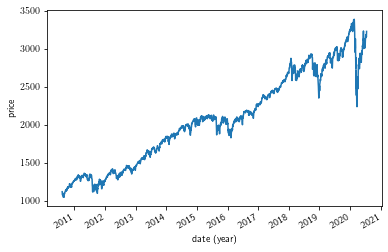

In [31]:
sp500['sp500'].plot(xlabel='date (year)', ylabel='price')
plt.savefig('sp500_price.png', dpi=400)

<AxesSubplot:xlabel='date (year)', ylabel='log return'>

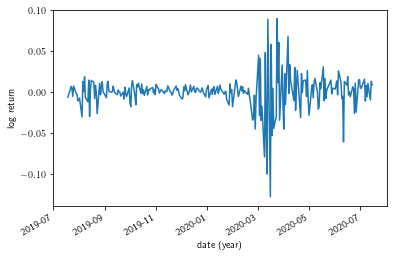

In [12]:
sp500['log_return'].plot(xlabel='date (year)', ylabel='log return')
plt.savefig('sp500_log.png', dpi=400)

In [6]:
sp500_series = sp500['log_return']
sp500_series

DATE
2010-08-10   -0.005985
2010-08-11   -0.028583
2010-08-12   -0.005393
2010-08-13   -0.004032
2010-08-16    0.000120
                ...   
2020-07-09   -0.005660
2020-07-10    0.010412
2020-07-13   -0.009407
2020-07-14    0.013317
2020-07-15    0.009041
Name: log_return, Length: 2500, dtype: float64

In [30]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

print(sp.stats.chi2.ppf(0.05, 40))
print(acorr_ljungbox(sp500_series, lags=[40]))
print(het_arch(sp500_series, nlags=40))

26.50930319669311
(array([363.0334266]), array([1.12285755e-53]))
(1061.7083825637008, 1.4394175419177745e-196, 45.91804287095701, 7.80085395596842e-263)


/home/mnovak/.local/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


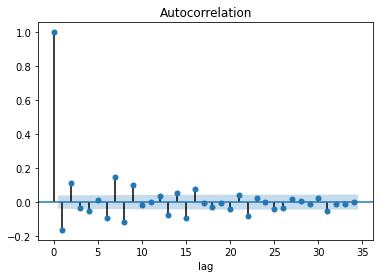

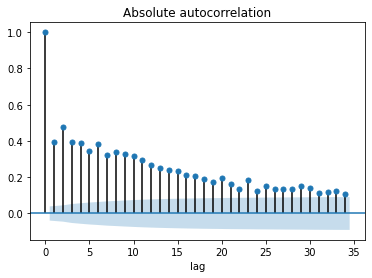

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sp500_series)
plt.xlabel('lag')
plt.savefig('sp500_ac.png', dpi=400)
plt.show()

plot_acf(np.abs(sp500_series))
plt.xlabel('lag')
plt.title("Absolute autocorrelation")
plt.savefig('sp500_aac.png', dpi=400)
plt.show()

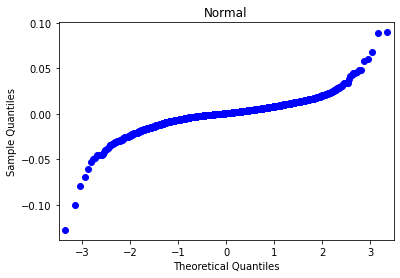

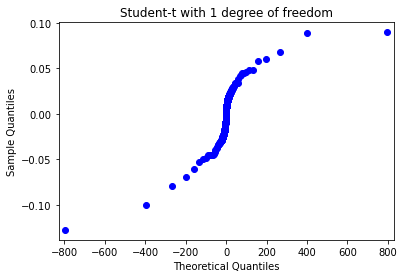

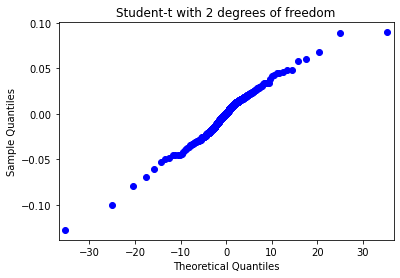

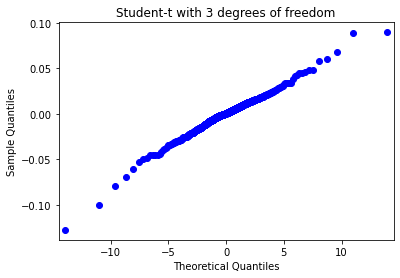

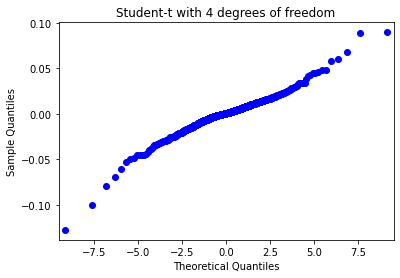

In [53]:
from statsmodels.graphics.gofplots import qqplot

qqplot(sp500_series)
plt.title("Normal")
plt.savefig('sp500_qq_norm.png', dpi=400)
plt.show()

qqplot(sp500_series, stats.t, distargs=(1,))
plt.title("Student-t with 1 degree of freedom")
plt.savefig('sp500_qq_t1.png', dpi=400)
plt.show()

qqplot(sp500_series, stats.t, distargs=(2,))
plt.title("Student-t with 2 degrees of freedom")
plt.savefig('sp500_qq_t2.png', dpi=400)
plt.show()

qqplot(sp500_series, stats.t, distargs=(3,))
plt.title("Student-t with 3 degrees of freedom")
plt.savefig('sp500_qq_t3.png', dpi=400)
plt.show()

qqplot(sp500_series, stats.t, distargs=(4,))
plt.title("Student-t with 4 degrees of freedom")
plt.savefig('sp500_qq_t4.png', dpi=400)
plt.show()

In [26]:
from scipy.stats import skew, kurtosis, jarque_bera
import seaborn as sns

print("Skewness: {:f}".format(skew(sp500_series)))
print("Kurtosis: {:f}".format(kurtosis(sp500_series)))
print("Jarque Bera: {:f} {:f}".format(*jarque_bera(sp500_series)))

Skewness: -0.918530
Kurtosis: 18.397526
Jarque Bera: 35608.723872 0.000000


In [ ]:
plt.rc('text', usetex=False)
ax = sns.distplot(sp500['log_return'], hist=False, label='S&P 500', norm_hist=True)
xx = np.arange(-100, +100, 0.00001)                                                   
yy = stats.norm.pdf(xx, loc=0, scale=1)   
print("Skewness: {:f}".format(skew(yy)))
print("Kurtosis: {:f}".format(kurtosis(yy)))
print("Jarque Bera: {:f} {:f}".format(*jarque_bera(yy)))
# and plot on the same axes that seaborn put the histogram
ax.plot(xx, yy, 'r', lw=1, label='Equivalent normal distribution') 
ax.set_ylim([0, 70])
ax.set_xlim([-0.2, 0.1])
ax.legend()
ax.set_xlabel("log return")
ax.set_ylabel("probability density")
plt.savefig('sp500_dist.png', dpi=400)
plt.show()

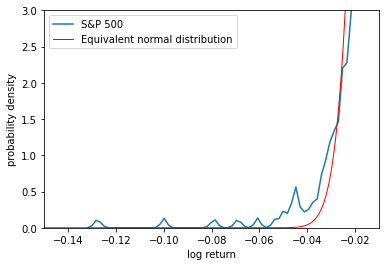

In [40]:
ax = sns.distplot(sp500['log_return'], hist=False, label='S&P 500', norm_hist=True)
xx = np.arange(-1, +1, 0.001)                                                   
yy = stats.norm.pdf(xx, loc=sp500_series.mean(), scale=sp500_series.std())                                                         
# and plot on the same axes that seaborn put the histogram
ax.plot(xx, yy, 'r', lw=1, label='Equivalent normal distribution') 
ax.set_ylim([0, 3])
ax.set_xlim([-0.15, -0.01])
ax.legend()
ax.set_xlabel("log return")
ax.set_ylabel("probability density")
plt.savefig('sp500_dist_zoom.png', dpi=400)
plt.show()

In [ ]:
def calculate_VaR()

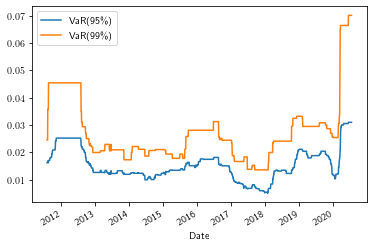

In [27]:
win_size = 250
alpha_list = [0.05, 0.01]
var_list = [np.zeros((sp500_series.size-win_size+1)) for i in alpha_list]
results = pd.DataFrame(index=sp500_series.index[win_size-1:])

for i in range(0, sp500_series.size-win_size+1):
    current_returns = sp500_series[i:i+win_size]
    for alpha, var in zip(alpha_list, var_list):
        var[i] = -current_returns.quantile(alpha)

for alpha, var in zip(alpha_list, var_list):
    results['VaR({}\%)'.format(int((1-alpha)*100))] = var
    
results.plot(xlabel='Date')
plt.savefig('univariate_VaR_historical.png', dpi=400)

In [24]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(99%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

1.38

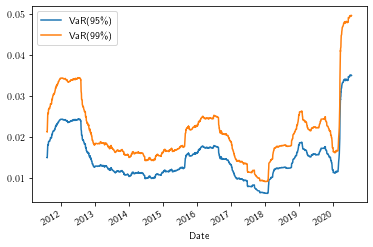

In [28]:
from scipy.stats import norm

win_size = 250
alpha_list = [0.05, 0.01]
var_list = [np.zeros((sp500_series.size-win_size+1)) for i in alpha_list]
results = pd.DataFrame(index=sp500_series.index[win_size-1:])

for i in range(0, sp500_series.size-win_size+1):
    current_returns = sp500_series[i:i+win_size]
    for alpha, var in zip(alpha_list, var_list):
        mean = current_returns.mean()
        std = current_returns.std()
        var[i] = -(mean + std*norm.ppf(alpha))

for alpha, var in zip(alpha_list, var_list):
    results['VaR({}\%)'.format(int((1-alpha)*100))] = var
    
results.plot(xlabel='Date')
plt.savefig('univariate_VaR_normal.png', dpi=400)

In [31]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(99\%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

2.98

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


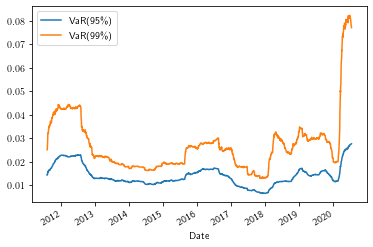

In [24]:
from scipy.stats import norm
from scipy.stats import t

win_size = 250
alpha_list = [0.05, 0.01]
var_list = [np.zeros((sp500_series.size-win_size+1)) for i in alpha_list]
results = pd.DataFrame(index=sp500_series.index[win_size-1:])

for i in range(0, sp500_series.size-win_size+1):
    if i % 100 == 0:
        print(i)
    current_returns = sp500_series[i:i+win_size]
    df, loc, scale = t.fit(current_returns, floc=0)
    for alpha, var in zip(alpha_list, var_list):
        var[i] = -t.ppf(alpha, df, loc, scale)

for alpha, var in zip(alpha_list, var_list):
    results['VaR({}\%)'.format(int((1-alpha)*100))] = var
    
results.plot(xlabel='Date')
plt.savefig('univariate_VaR_t.png', dpi=400)

In [22]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(95\%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

6.75

In [23]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(99\%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

1.64

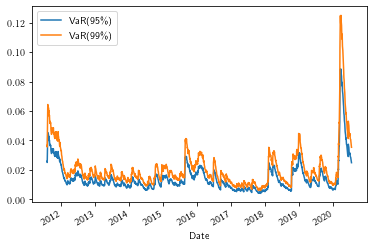

In [37]:
from scipy.stats import norm

win_size = 250
alpha_list = [0.05, 0.01]
l = 0.94
var_list = [np.zeros((sp500_series.size-win_size+1)) for i in alpha_list]
results = pd.DataFrame(index=sp500_series.index[win_size-1:])

sigma = sp500_series[0]**2
for i in range(1, win_size):
    sigma = (1-l)*sp500_series[i-1]**2 + l*sigma

for i in range(0, sp500_series.size-win_size+1):
    current_returns = sp500_series[i:i+win_size]
    sigma = (1-l)*sp500_series[win_size+i-1]**2 + l*sigma
    std = np.sqrt(sigma)
    mean = current_returns.mean()
    for alpha, var in zip(alpha_list, var_list):
        var[i] = -(mean + std*norm.ppf(alpha))

for alpha, var in zip(alpha_list, var_list):
    results['VaR({}\%)'.format(int((1-alpha)*100))] = var
    
results.plot(xlabel='Date')
plt.savefig('univariate_VaR_ewma.png', dpi=400)

In [36]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(99\%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

2.0

In [8]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [9]:
rscript="""
    library(rugarch)
    calculate_var_garch <- function(tau, returns){
        uspec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1,1)),mean.model = list(armaOrder = c(0,0), include.mean = TRUE),distribution.model = "std")
        fit.garch <- ugarchfit(spec = uspec, data = returns)
        set.seed(42) 
        boot.garch <- ugarchboot(fit.garch,method=c("Partial","Full")[1],sampling="raw",n.ahead=1, n.bootpred=10000, solver="solnp")
        rvec <- boot.garch@fseries
        quantile(rvec,tau)
    }
"""

ro.r(rscript)
calculate_var_garch = ro.r['calculate_var_garch']

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘rugarch’


R[write to console]: The following object is masked from ‘package:stats’:

    sigma




In [54]:
from arch import arch_model

In [65]:
current_returns.index

DatetimeIndex(['2010-08-10', '2010-08-11', '2010-08-12', '2010-08-13',
               '2010-08-16', '2010-08-17', '2010-08-18', '2010-08-19',
               '2010-08-20', '2010-08-23',
               ...
               '2011-07-22', '2011-07-25', '2011-07-26', '2011-07-27',
               '2011-07-28', '2011-07-29', '2011-08-01', '2011-08-02',
               '2011-08-03', '2011-08-04'],
              dtype='datetime64[ns]', name='DATE', length=250, freq=None)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


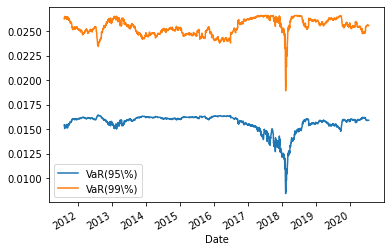

<IPython.core.display.Javascript object>

In [79]:
%%notify


win_size = 250
alpha_list = [0.05, 0.01]
var_list = [np.zeros((sp500_series.size-win_size+1)) for i in alpha_list]
results = pd.DataFrame(index=sp500_series.index[win_size-1:])

for i in range(0, sp500_series.size-win_size+1):
    current_returns = sp500_series[i:i+win_size]
    if (i % 100 == 0):
        print(i)
    am = arch_model(100*current_returns, mean='Zero', vol='Garch', p=1, o=0, q=1, dist='studentst')
    res = am.fit(disp='off', show_warning=False, first_obs=current_returns.index[0])
    forecasts = res.forecast()
    for alpha, var in zip(alpha_list, var_list):
        var[i] = -am.distribution.ppf(alpha, res.params[-1:])/100

for alpha, var in zip(alpha_list, var_list):
    results['VaR({}\%)'.format(int((1-alpha)*100))] = var
    
results.plot(xlabel='Date')
plt.savefig('univariate_VaR_garch.png', dpi=400) 

In [82]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(95\%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

5.46

In [83]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(99\%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

1.91

In [12]:
rscript="""
    library(kernlab)
    calculate_var <- function(tau, returns){
        x <- 1:length(returns)
        qrm <- kqr(x, returns, tau=tau, C=0.1, kpar=list(sigma=1), kernel='rbfdot')
        predict(qrm, length(returns)+1)
    }
"""

ro.r(rscript)
calculate_var = ro.r['calculate_var']

R[write to console]: 
Attaching package: ‘kernlab’


R[write to console]: The following object is masked from ‘package:rugarch’:

    convergence




0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

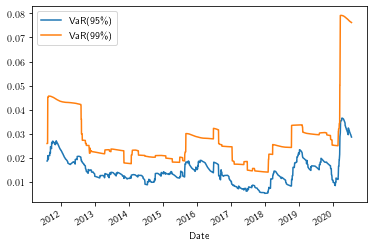

<IPython.core.display.Javascript object>

In [13]:
%%notify

win_size = 250
alpha_list = [0.05, 0.01]
var_list = [np.zeros((sp500_series.size-win_size+1)) for i in alpha_list]
results = pd.DataFrame(index=sp500_series.index[win_size-1:])

for i in range(0, sp500_series.size-win_size+1):
    current_returns = sp500_series[i:i+win_size]
    if (i % 10 == 0):
        print(i)
    for alpha, var in zip(alpha_list, var_list):
        var[i] = -np.array(calculate_var(alpha, current_returns.to_numpy()))

for alpha, var in zip(alpha_list, var_list):
    results['VaR({}\%)'.format(int((1-alpha)*100))] = var
    
 
results.plot(xlabel='Date')
plt.savefig('univariate_VaR_kqr.png', dpi=400)   

In [18]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(95\%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

5.15

In [19]:
I = [1 if log_return < -VaR else 0 for VaR, log_return in zip(results['VaR(99\%)'], sp500_series[win_size-1:])]
round(sum(I)/len(I)*100, 2)

0.93

# Part 2

In [3]:
#written by Enzo Michelangeli, style changes by josef-pktd
# Student's T random variable
def multivariate_t_rvs(m, S, df=np.inf, n=1):
    '''generate random variables of multivariate t distribution
    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))
    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal

In [59]:
from scipy.stats import t

n_assets = 10
b = 1/n_assets*np.ones((n_assets, 1))
means = np.zeros(n_assets)
np.random.seed(42)
Sigma = np.random.rand(n_assets, n_assets)/100
Sigma = np.dot(Sigma,Sigma.transpose())
matrix = multivariate_t_rvs(means, Sigma, df=4, n=100000)
Returns = np.dot(matrix, b)
VaR_005 = -np.quantile(Returns, 0.05)
VaR_001 = -np.quantile(Returns, 0.01)
print('theoretical VaR(0.05): {}'.format(round(VaR_005*100, 2)))
print('theoretical VaR(0.01): {}'.format(round(VaR_001*100, 2)))
print('theoretical ES(0.05): {}'.format(round(-Returns[Returns < -VaR_005].mean()*100, 2)))
print('theoretical ES(0.01): {}'.format(round(-Returns[Returns < -VaR_001].mean()*100, 2)))

theoretical VaR(0.05): 3.19
theoretical VaR(0.01): 5.64
theoretical ES(0.05): 4.78
theoretical ES(0.01): 7.79


In [42]:
X = multivariate_t_rvs(means, Sigma, df=4, n=2000)

from sklearn.decomposition import FastICA

n_components=4
transformer = FastICA(n_components=n_components, random_state=42)
Y = transformer.fit_transform(X)

M = 1000000
N = 10
emp_VaR005 = np.zeros(N)
emp_VaR001 = np.zeros(N)
emp_ES005 = np.zeros(N)
emp_ES001 = np.zeros(N)
params = []

for i in range(n_components):
    y_i = Y[:,i]
    df, loc, scale = t.fit(y_i)
    params.append((df, loc, scale))

for i in range(N):
    print(i)
    Y_samples = np.zeros((M, n_components))
    for j in range(n_components):
        Y_samples[:,j] = t.rvs(params[j][0], params[j][1], params[j][2], size=M, random_state=42)

    X_samples = transformer.inverse_transform(Y_samples)
    Sample_Returns = np.dot(X_samples, b)
    temp1 = -np.quantile(Sample_Returns, 0.05)
    temp2 = -np.quantile(Sample_Returns, 0.01)
    emp_VaR005[i] += temp1
    emp_VaR001[i] += temp2
    emp_ES005[i] += -Sample_Returns[Sample_Returns < -temp1].mean()
    emp_ES001[i] += -Sample_Returns[Sample_Returns < -temp2].mean()
    

print('empirical VaR(0.05): {}'.format(round(emp_VaR005.mean()*100, 2)))
print('empirical VaR(0.01): {}'.format(round(emp_VaR001.mean()*100, 2)))
print('empirical ES(0.05): {}'.format(round(emp_ES005.mean()*100, 2)))
print('empirical ES(0.01): {}'.format(round(emp_ES001.mean()*100, 2)))

0
1
2
3
4
5
6
7
8
9
empirical VaR(0.05): 3.22
empirical VaR(0.01): 5.27
empirical ES(0.05): 4.58
empirical ES(0.01): 7.1


In [10]:
%%notify
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import StudentTUnivariate

dist = GaussianMultivariate(distribution=StudentTUnivariate)
dist.fit(X)

<IPython.core.display.Javascript object>

In [49]:
%%notify
from copulas.multivariate import VineCopula
from copulas.univariate import StudentTUnivariate

center = VineCopula('center')
regular = VineCopula('regular')
direct = VineCopula('direct')

center.fit(pd.DataFrame(X))
regular.fit(pd.DataFrame(X))
direct.fit(pd.DataFrame(X))

/home/mnovak/.local/lib/python3.7/site-packages/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


<IPython.core.display.Javascript object>

In [57]:
M = 100
N = 10
emp_VaR005 = np.zeros(N)
emp_VaR001 = np.zeros(N)
emp_ES005 = np.zeros(N)
emp_ES001 = np.zeros(N)

for i in range(N):
    print(i)
    X_samples = center.sample(M).to_numpy()
    Sample_Returns = np.dot(X_samples, b)
    temp1 = -np.quantile(Sample_Returns, 0.05)
    temp2 = -np.quantile(Sample_Returns, 0.01)
    emp_VaR005[i] += temp1
    emp_VaR001[i] += temp2
    emp_ES005[i] += -Sample_Returns[Sample_Returns < -temp1].mean()
    emp_ES001[i] += -Sample_Returns[Sample_Returns < -temp2].mean()
    
print('empirical VaR(0.05): {}'.format(round(emp_VaR005.mean()*100, 2)))
print('empirical VaR(0.01): {}'.format(round(emp_VaR001.mean()*100, 2)))
print('empirical ES(0.05): {}'.format(round(emp_ES005.mean()*100, 2)))
print('empirical ES(0.01): {}'.format(round(emp_ES001.mean()*100, 2)))

0
1
2
3
4
5
6
7
8
9
empirical VaR(0.05): 4.68
empirical VaR(0.01): 8.02
empirical ES(0.05): 7.45
empirical ES(0.01): 12.0
